In [1]:
## Importing important packages
## Pandas and numpy are for dataframes
## and data analysis. NLTK and TextBlob
## are for natural language processing.
## Wordcloud and matplotlib are used for
## data visualization.

import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
from wordcloud import WordCloud

% matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [2]:
## Reading the new dataframe after cleaning up

df = pd.read_csv('new_df.csv')
df = df.drop('Unnamed: 0', 1)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means. 1. i am...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


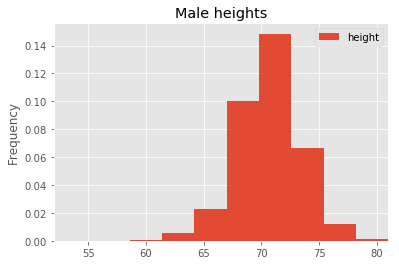

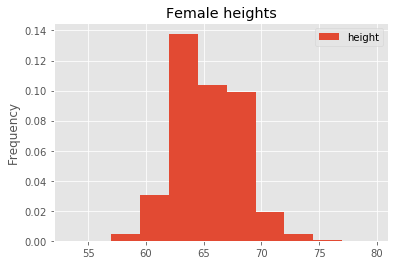

In [3]:
## The first example analyses will be a comparison
## between height for male and female users

## The males shown here in the histograms are a bit
## taller than the female population. This makes sense
## because it follows the national average.

df[['sex', 'height']].loc[df.sex == 'm'].plot.hist(xlim=(52, 81), normed=True, title='Male heights')
df[['sex', 'height']].loc[df.sex == 'f'].plot.hist(xlim=(52, 81), normed=True, title='Female heights')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000262001FC470>], dtype=object)

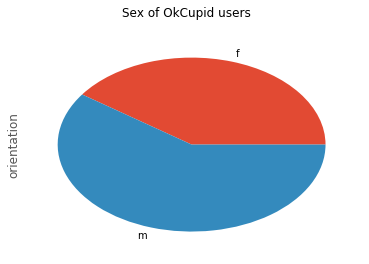

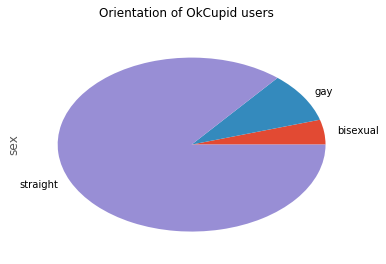

In [4]:
## An interesting question that might be
## raised is: How is the dating pool?
## Are there more men than women?
## What sexual orientation is the norm for
## OkCupid users?

df[['sex','orientation']].groupby('sex').count().plot.pie(legend=False, title='Sex of OkCupid users', subplots=True)
df[['sex','orientation']].groupby('orientation').count().plot.pie(legend=False, title='Orientation of OkCupid users', subplots=True)

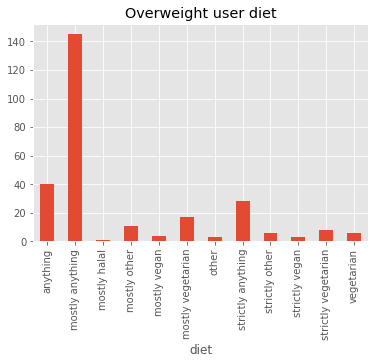

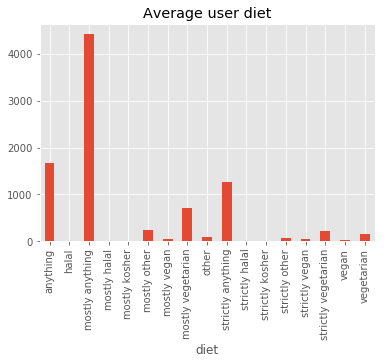

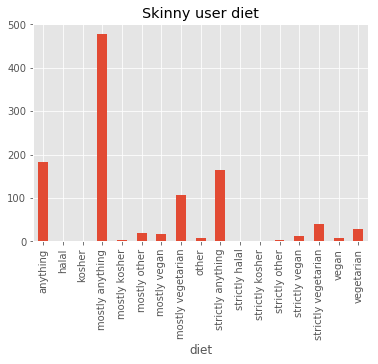

In [5]:
## Something that we could predict is
## What are the relationships between
## body type and diet?

## We will compare: overweight, average,
## and skinny

df[['body_type', 'diet']].loc[df.body_type == 'overweight'].groupby('diet').count().plot.bar(title='Overweight user diet', legend=False)
df[['body_type', 'diet']].loc[df.body_type == 'average'].groupby('diet').count().plot.bar(title='Average user diet', legend=False)
df[['body_type', 'diet']].loc[df.body_type == 'skinny'].groupby('diet').count().plot.bar(title='Skinny user diet', legend=False)


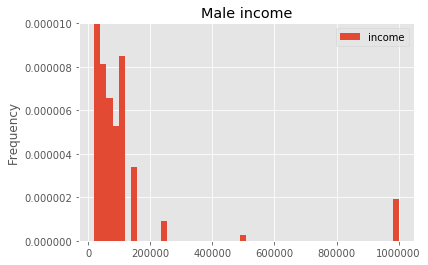

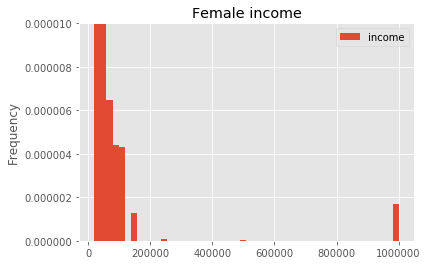

In [6]:
## Comparison between sex and income.

male_income = df[['sex','income']].loc[df.sex == 'm']
female_income = df[['sex','income']].loc[df.sex == 'f']
male_income = male_income[male_income != -1]
female_income = female_income[female_income != -1]

male_income.plot.hist(normed=True, title='Male income', ylim=[0,.00001], bins=50)
female_income.plot.hist(normed=True, title='Female income', ylim=[0,.00001], bins=50)

In [7]:
## Creating a list of men essays and women essays.

all_men_essays = []
men = df[df.sex == 'm']
for essay in men['essay0']:
    all_men_essays.append(essay)
for essay in men['essay1']:
    all_men_essays.append(essay)
for essay in men['essay2']:
    all_men_essays.append(essay)
for essay in men['essay3']:
    all_men_essays.append(essay)
for essay in men['essay4']:
    all_men_essays.append(essay)
for essay in men['essay5']:
    all_men_essays.append(essay)
for essay in men['essay6']:
    all_men_essays.append(essay)
for essay in men['essay7']:
    all_men_essays.append(essay)
for essay in men['essay8']:
    all_men_essays.append(essay)
for essay in men['essay9']:
    all_men_essays.append(essay)    
all_men_essays = [x for x in all_men_essays if str(x) != 'nan']
all_men_essays = ' '.join(all_men_essays)

all_women_essays = []
women = df[df.sex == 'f']
for essay in women['essay0']:
    all_women_essays.append(essay)
for essay in women['essay1']:
    all_women_essays.append(essay)
for essay in women['essay2']:
    all_women_essays.append(essay)
for essay in women['essay3']:
    all_women_essays.append(essay)
for essay in women['essay4']:
    all_women_essays.append(essay)
for essay in women['essay5']:
    all_women_essays.append(essay)
for essay in women['essay6']:
    all_women_essays.append(essay)
for essay in women['essay7']:
    all_women_essays.append(essay)
for essay in women['essay8']:
    all_women_essays.append(essay)
for essay in women['essay9']:
    all_women_essays.append(essay)
all_women_essays = [x for x in all_women_essays if str(x) != 'nan']
all_women_essays = ' '.join(all_women_essays)

In [8]:
## Let's examine some essays now
## We are going to start with most
## repeated words by gender

all_men_words = all_men_essays.split()
men_freq = nltk.FreqDist(all_men_words)
men_freq = men_freq.most_common(500)

all_women_words = all_women_essays.split()
women_freq = nltk.FreqDist(all_women_words)
women_freq = women_freq.most_common(500)

men_women_df = pd.concat([pd.DataFrame(men_freq)[0], pd.DataFrame(women_freq)[0]], axis=1)
men_women_df.columns = ['men', 'women']
men_women_df.head()

,men,women
0,i,i
1,and,and
2,the,the
3,to,to
4,a,a


In [9]:
## Here we will take the top 500 words and find the unique
## words for each gender

men = pd.DataFrame(men_freq)[0]
women = pd.DataFrame(women_freq)[0]

unique_men = list(set(men) - set(women))
unique_women = list(set(women) - set(men))

unique_df = pd.concat([pd.DataFrame(unique_men), pd.DataFrame(unique_women)], axis=1)
unique_df.columns = ['unique_men', 'unique_women']
unique_df.head(15)

,unique_men,unique_women
0,sports,chocolate
1,three,sex
2,woman,comfortable
3,means,local
4,internet,change
5,business,laugh.
6,star,huge
7,future,family.
8,lost,crazy
9,do.,healthy


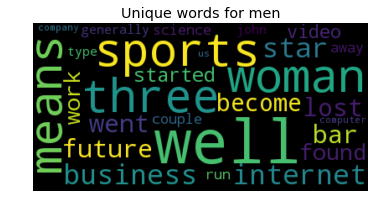

In [10]:
men_wordcloud = WordCloud().generate(' '.join(unique_men))
plt.imshow(men_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for men")

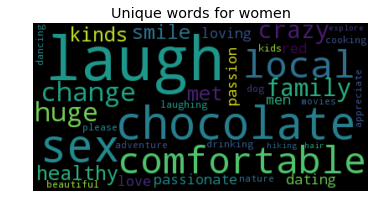

In [11]:
women_wordcloud = WordCloud().generate(' '.join(unique_women))
plt.imshow(women_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for women")

In [12]:
## An interesting comparison that could also be
## made is with space camp graduates vs college
## graduates

space_camp_grads = df[df.education == 'graduated from space camp']
all_space_camp_essays = []

for essay in space_camp_grads['essay0']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay1']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay2']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay3']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay4']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay5']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay6']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay7']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay8']:
    all_space_camp_essays.append(essay)
for essay in space_camp_grads['essay9']:
    all_space_camp_essays.append(essay)
    
all_space_camp_essays = [x for x in all_space_camp_essays if str(x) != 'nan']
all_space_camp_essays = ' '.join(all_space_camp_essays)

college_grads = df[df.education == 'graduated from college/university']
all_college_grad_essays = []

for essay in college_grads['essay0']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay1']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay2']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay3']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay4']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay5']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay6']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay7']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay8']:
    all_college_grad_essays.append(essay)
for essay in college_grads['essay9']:
    all_college_grad_essays.append(essay)
    
all_college_grad_essays = [x for x in all_college_grad_essays if str(x) != 'nan']
all_college_grad_essays = ' '.join(all_college_grad_essays)

In [13]:
## Comparison of essay between space camp
## graduates and college graduates

all_space_words = all_space_camp_essays.split()
space_freq = nltk.FreqDist(all_space_words)
space_freq = space_freq.most_common(500)

all_college_words = all_college_grad_essays.split()
college_freq = nltk.FreqDist(all_college_words)
college_freq = college_freq.most_common(500)

space = pd.DataFrame(space_freq)[0]
college = pd.DataFrame(college_freq)[0]

unique_space = list(set(space) - set(college))
unique_college = list(set(college) - set(space))

unique_df = pd.concat([pd.DataFrame(unique_space), pd.DataFrame(unique_college)], axis=1)
unique_df.columns = ['unique_space', 'unique_college']
unique_df.head(15)

,unique_space,unique_college
0,head,running
1,sex,staying
2,must,serious
3,women,5.
4,idea,sports
5,typical,traveling
6,building,--
7,"rel=""nofollow""",internet
8,woman,short
9,"yes,",laugh.


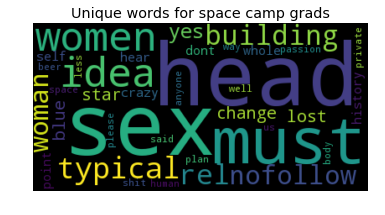

In [14]:
space_wordcloud = WordCloud().generate(' '.join(unique_space))
plt.imshow(space_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for space camp grads")

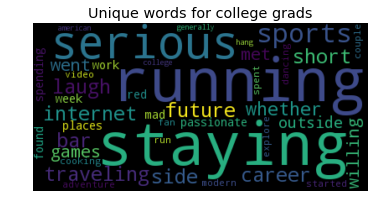

In [15]:
college_wordcloud = WordCloud().generate(' '.join(unique_college))
plt.imshow(college_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for college grads")

In [16]:
wiki = TextBlob(all_men_essays)
wiki.sentiment

Sentiment(polarity=0.1828536250306574, subjectivity=0.5110491071623038)

In [17]:
wiki = TextBlob(all_women_essays)
wiki.sentiment

Sentiment(polarity=0.2041024355298141, subjectivity=0.5254430506753406)

In [ ]:
## An interesting comparison that could also be
## made is with space camp graduates vs college
## graduates

high_school_drop = df[df.education == 'dropped out of high school']
all_dropout_essays = []

for essay in high_school_drop['essay0']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay1']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay2']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay3']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay4']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay5']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay6']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay7']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay8']:
    all_dropout_essays.append(essay)
for essay in high_school_drop['essay9']:
    all_dropout_essays.append(essay)
    
all_dropout_essays = [x for x in all_dropout_essays if str(x) != 'nan']
all_dropout_essays = ' '.join(all_dropout_essays)

phd_grads = df[df.education == 'graduated from ph.d program']
all_phd_essays = []

for essay in phd_grads['essay0']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay1']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay2']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay3']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay4']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay5']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay6']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay7']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay8']:
    all_phd_essays.append(essay)
for essay in phd_grads['essay9']:
    all_phd_essays.append(essay)
    
all_phd_essays = [x for x in all_phd_essays if str(x) != 'nan']
all_phd_essays = ' '.join(all_phd_essays)

In [ ]:
## Comparison of essay between high school
## dropouts and Ph.D graduates

all_dropout_words = all_dropout_essays.split()
dropout_freq = nltk.FreqDist(all_dropout_words)
dropout_freq = dropout_freq.most_common(500)

all_phd_words = all_phd_essays.split()
phd_freq = nltk.FreqDist(all_college_words)
phd_freq = phd_freq.most_common(500)

dropout = pd.DataFrame(dropout_freq)[0]
phd = pd.DataFrame(phd_freq)[0]

unique_dropout = list(set(dropout) - set(phd))
unique_phd = list(set(phd) - set(dropout))

unique_df = pd.concat([pd.DataFrame(unique_dropout), pd.DataFrame(unique_phd)], axis=1)
unique_df.columns = ['unique_dropout', 'unique_phd']
unique_df.head(15)

In [ ]:
dropout_wordcloud = WordCloud().generate(' '.join(unique_dropout))
plt.imshow(dropout_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for high school dropouts")

In [ ]:
phd_wordcloud = WordCloud().generate(' '.join(unique_phd))
plt.imshow(phd_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Unique words for Ph.D grads")

In [ ]:
## This takes forever to run (1+ hour)
## wiki.ngrams(n=3)